# Лабораторная работа 3. Библиотеки Numpy и Scipy. Обработка табличных данных. Аппроксимация

## Вариант 12 

## Задание 1. 

In [1]:
import numpy as np
import scipy as sp
import random
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
random_array = np.random.randint(0, 10000, size=100)
sorted_array = np.sort(random_array)
reverse_sorted_array = np.sort(random_array)[::-1]
print(*random_array, "\n")
print(*sorted_array, "\n")
print(*reverse_sorted_array, "\n")
print("Минимальное значение равно {0}, индекс этого значения - {1} .\n\
Максимальное значение равно  {2}, индекс этого значения -  {3}.".format(np.min(random_array),
                                                                  np.where(random_array == np.min(random_array))[0][0], \
                                                                  np.max(random_array), \
                                                                  np.where(random_array == np.max(random_array))[0][0]))

6338 6751 7060 9253 4453 9654 3863 3466 9509 4666 8179 8804 2492 4980 3179 2616 7593 8506 2323 2923 1377 9964 4087 9709 4607 6081 9287 4330 612 7679 8463 6578 1450 2040 5224 7565 1256 6974 352 5238 8893 3785 4146 1659 3217 5491 9198 5915 7669 6038 7955 7478 7692 2795 8616 4094 1767 5183 4506 2880 4624 7906 6355 607 2105 3533 487 3590 8203 7775 7969 519 1245 8533 6695 8830 6439 3651 8685 3609 9942 5596 1609 8395 7220 2119 8080 3199 1076 2881 4873 164 1168 7953 58 2613 9985 3821 116 5840 

58 116 164 352 487 519 607 612 1076 1168 1245 1256 1377 1450 1609 1659 1767 2040 2105 2119 2323 2492 2613 2616 2795 2880 2881 2923 3179 3199 3217 3466 3533 3590 3609 3651 3785 3821 3863 4087 4094 4146 4330 4453 4506 4607 4624 4666 4873 4980 5183 5224 5238 5491 5596 5840 5915 6038 6081 6338 6355 6439 6578 6695 6751 6974 7060 7220 7478 7565 7593 7669 7679 7692 7775 7906 7953 7955 7969 8080 8179 8203 8395 8463 8506 8533 8616 8685 8804 8830 8893 9198 9253 9287 9509 9654 9709 9942 9964 9985 

9985 9964 9942

## Задание 2.

In [3]:
x = np.array([0.06, 0.07, 0.08, 0.09, 0.11, 0.15, 0.19, 0.28])
y = np.array([66.48, 63.23, 70.24, 99.19, 82.52, 44.56, 61.02, 82.16])
new_x = np.arange(0.06, 0.28, 0.01)

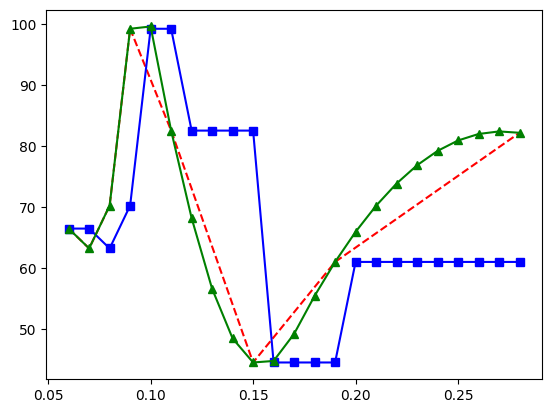

In [4]:
plt.plot(x, y, 'r--') #Базовый график
plt.plot(new_x, sp.interpolate.interp1d(x, y, kind='zero')(new_x), 'bs-') #Интерполированный ступенчатый
plt.plot(new_x, sp.interpolate.interp1d(x, y, kind='quadratic')(new_x), 'g^-') #Интерполированный квадратичный
plt.show()

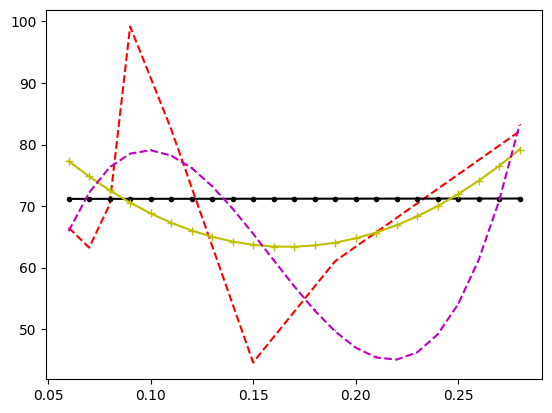

In [5]:
plt.plot(x, y, 'r--') #Базовый график
plt.plot(new_x, np.polyval(np.polyfit(x, y, deg = 1), new_x), 'k.-')# Полиномиальная аппроксимация 1й степени
plt.plot(new_x, np.polyval(np.polyfit(x, y, deg = 2), new_x), 'y+-')# Полиномиальная аппроксимация 2й степени
plt.plot(new_x, np.polyval(np.polyfit(x, y, deg = 3), new_x), 'm,--')# Полиномиальная аппроксимация 3й степени
plt.show()

## Задание 3.

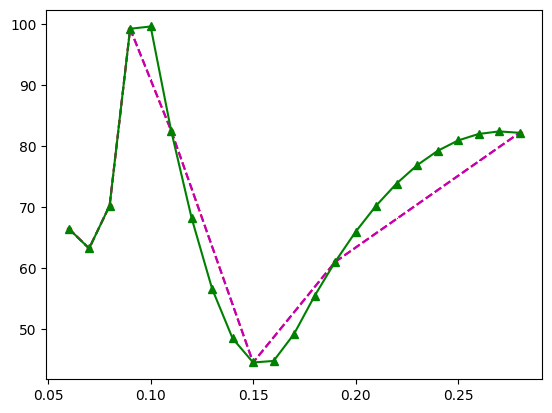

In [6]:
def interpol(x, y, new_x):
    new_y = np.zeros_like(new_x)

    k = np.diff(y) / np.diff(x)  # Угол наклона(для всех)
    b = y[:-1] - k * x[:-1]      # Смещение(для всех)

    # Для каждой точки new_x находим соответствующий интервал и вычисляем y
    for i, xi in enumerate(new_x):
        # Находим индекс интервала, в который попадает xi
        idx = np.searchsorted(x, xi) - 1
        
        # Обрабатываем случай, когда xi выходит за пределы x
        if idx < 0:
            idx = 0
        elif idx >= len(k):
            idx = len(k) - 1
        
        # Вычисляем y
        new_y[i] = k[idx] * xi + b[idx]
    
    return new_y

plt.plot(x, y, 'r.--') #Базовый график
plt.plot(new_x, interpol(x, y, new_x), 'm,--') # Мною написанная интерполяция(визулаьно)
plt.plot(new_x, sp.interpolate.interp1d(x, y, kind='quadratic')(new_x), 'g^-') #Интерполированный квадратичный
plt.show()

ну вообще выглядит бесполезно, но для цели примерного соединения полезно круто


## Задание 4.

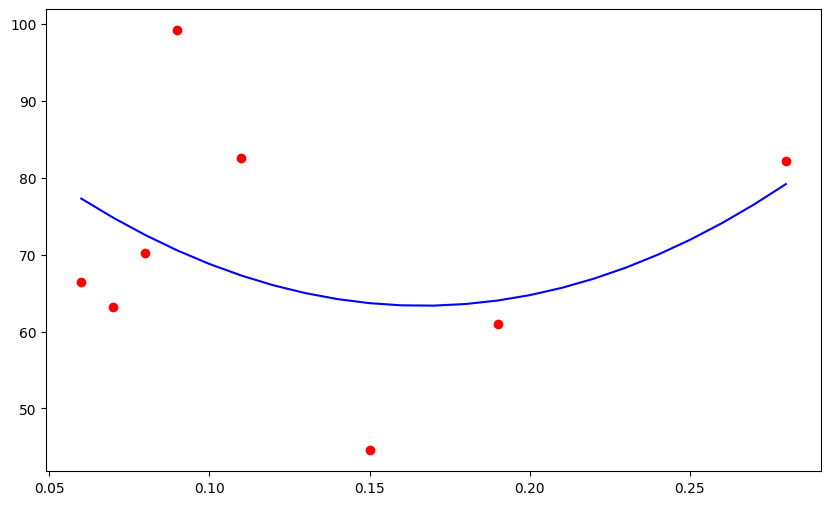

1692.7232249142394


In [7]:
def quadratic_least_squares(x, y, new_x):
    # Создаем матрицу системы
    n = len(x)
    sum_x = np.sum(x)
    sum_x2 = np.sum(x ** 2)
    sum_x3 = np.sum(x ** 3)
    sum_x4 = np.sum(x ** 4)
    
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2y = np.sum(x ** 2 * y)
    
    # Матрица коэффициентов системы уравнений
    A = np.array([
        [n, sum_x, sum_x2],
        [sum_x, sum_x2, sum_x3],
        [sum_x2, sum_x3, sum_x4]
    ])
    
    # Вектор правой части системы уравнений
    B = np.array([sum_y, sum_xy, sum_x2y])
    
    # Решение системы уравнений для нахождения коэффициентов 
    c,b,a = np.linalg.solve(A, B)

    new_y = a * (new_x ** 2) + b * new_x + c
    
    # Вычисление суммы квадратов отклонений 
    y_pred = a * (x ** 2) + b * x + c
    sse = np.sum((y - y_pred) ** 2)
    return new_y, sse

new_y, sse = quadratic_least_squares(x, y, new_x)
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Исходные данные')
plt.plot(new_x, new_y, 'b-', label='Аппроксимация (ax² + bx + c)')
plt.show()
print(sse)

## Задание 5.

C:\Users\nikso\AppData\Local\Temp\ipykernel_25004\1705908232.py:11: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c
C:\Users\nikso\AppData\Local\Temp\ipykernel_25004\1705908232.py:31: OptimizeWarning: Covariance of the parameters could not be estimated
  plt.plot(new_x, power_func(new_x, *sp.optimize.curve_fit(power_func, x, y)[0]) , 'k-', linewidth=2)


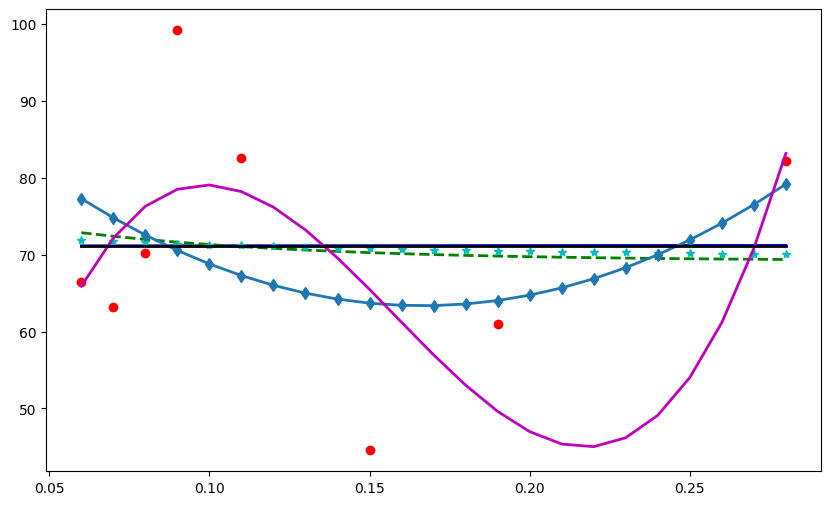

In [8]:
def lin_func(x, a, b):
    return a*x + b

def exp_func(x, a, b, c):
    return a * np.exp(b * x) + c

def rational_func(x, a, b, c, d):
    return (a * x + b) / (x**2 + c * x + d)

def log_func(x, a, b, c):
    return a * np.log(b * x) + c

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_func(x,a,b,c,d):
    return a * x ** 3 + b * x ** 2 + c * x + d

def power_func(x, a, b, c):
    return a * x**b + c


plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='red', label='Исходные данные')
plt.plot(new_x, lin_func(new_x, *sp.optimize.curve_fit(lin_func, x, y)[0]) , 'b-', linewidth=2, label='Аппроксимирующая прямая')
plt.plot(new_x, exp_func(new_x, *sp.optimize.curve_fit(exp_func, x, y)[0]) , 'g--', linewidth=2)
#plt.plot(new_x, rational_func(new_x, *sp.optimize.curve_fit(rational_func, x, y)[0]) , 'b-', linewidth=2, label='Аппроксимирующая прямая') не нашло опт. параметры
plt.plot(new_x, log_func(new_x, *sp.optimize.curve_fit(log_func, x, y)[0]) , 'c*', linewidth=2)
plt.plot(new_x, quadratic_func(new_x, *sp.optimize.curve_fit(quadratic_func, x, y)[0]) , 'd-', linewidth=2)
plt.plot(new_x, cubic_func(new_x, *sp.optimize.curve_fit(cubic_func, x, y)[0]) , 'm-', linewidth=2)
plt.plot(new_x, power_func(new_x, *sp.optimize.curve_fit(power_func, x, y)[0]) , 'k-', linewidth=2)
plt.show()

в итоге самая подходящая функция это полином третьей степени

## Задание 6

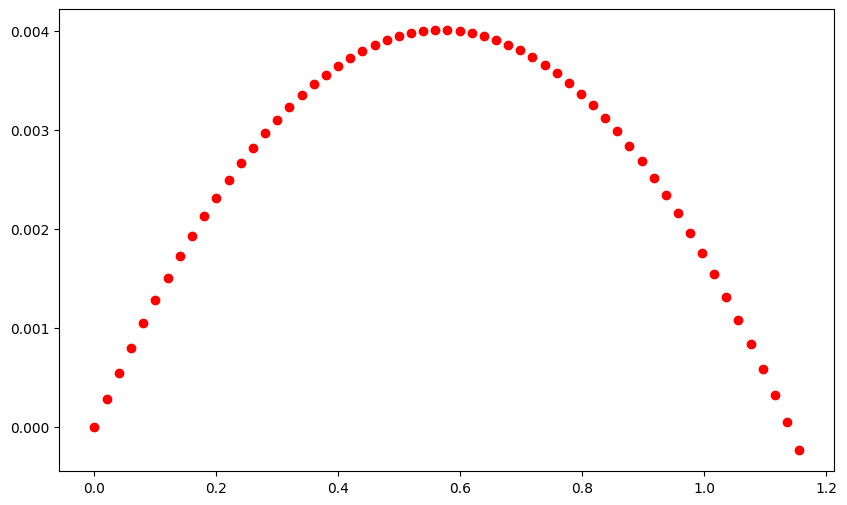

In [9]:
readed_df = pd.read_excel("flight.xlsx")
plt.figure(figsize=(10, 6))
plt.scatter(readed_df['x'], readed_df['y'], color='red', label='Исходные данные')
plt.show()

## Задание 7

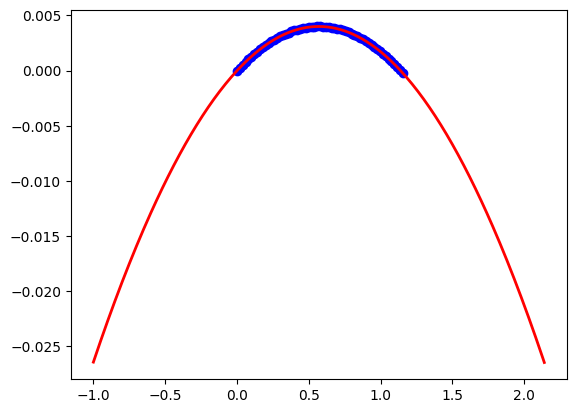

In [11]:
new_x = np.arange(-1, 2.15, 0.01)
new_y = quadratic_func(new_x, *sp.optimize.curve_fit(quadratic_func, readed_df['x'], readed_df['y'])[0])
plt.plot(new_x, new_y, 'r-', linewidth=2)
plt.scatter(readed_df['x'], readed_df['y'], color='b')
plt.show()
save_df = pd.DataFrame({'x':new_x,'y': new_y})
save_df.to_excel("saveme.xlsx", index=False)